<a href="https://colab.research.google.com/github/Shashank-agastya/data_analytics/blob/main/Copy_of_supermarket_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
#Load the Dateset

In [ ]:
df=pd.read_csv(r'/Supermart Grocery Sales - Retail Analytics Dataset.csv')
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
#Inorder to print the number of rows and columns
df.shape

(9994, 11)

In [ ]:
df.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [ ]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [ ]:
#Data cleaning

In [ ]:
df.isnull().sum()


,0
Order ID,0
Customer Name,0
Category,0
Sub Category,0
City,0
Order Date,0
Region,0
Sales,0
Discount,0
Profit,0


In [ ]:
df.dropna()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
#Convert Date to Date time

In [ ]:
#Convert Date to Date time
print(df['Order Date'].dtype)

object


In [ ]:
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')


In [ ]:
df['Order Day']=df['Order Date'].dt.day
df['Order Month']=df['Order Date'].dt.month
df['Order Year']=df['Order Date'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     4042 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
 11  Order Day      4042 non-null   float64       
 12  Order Month    4042 non-null   float64       
 13  Order Year     4042 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(7)
memory usage: 1.1+

In [ ]:
#Converting categorical variables to numerical
lr=LabelEncoder()
df['Category']=lr.fit_transform(df['Category'])
df['Sub Category']=lr.fit_transform(df['Sub Category'])
df['Region']=lr.fit_transform(df['Region'])
df['State']=lr.fit_transform(df['State'])
df['City']=lr.fit_transform(df['City'])
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,5,14,21,2017-11-08,2,1254,0.12,401.28,0,8.0,11.0,2017.0
1,OD2,Sudha,1,13,8,2017-11-08,3,749,0.18,149.80,0,8.0,11.0,2017.0
2,OD3,Hussain,3,0,13,2017-06-12,4,2360,0.21,165.20,0,12.0,6.0,2017.0
3,OD4,Jackson,4,12,4,2016-10-11,3,896,0.25,89.60,0,11.0,10.0,2016.0
4,OD5,Ridhesh,3,18,12,2016-10-11,3,2355,0.26,918.45,0,11.0,10.0,2016.0


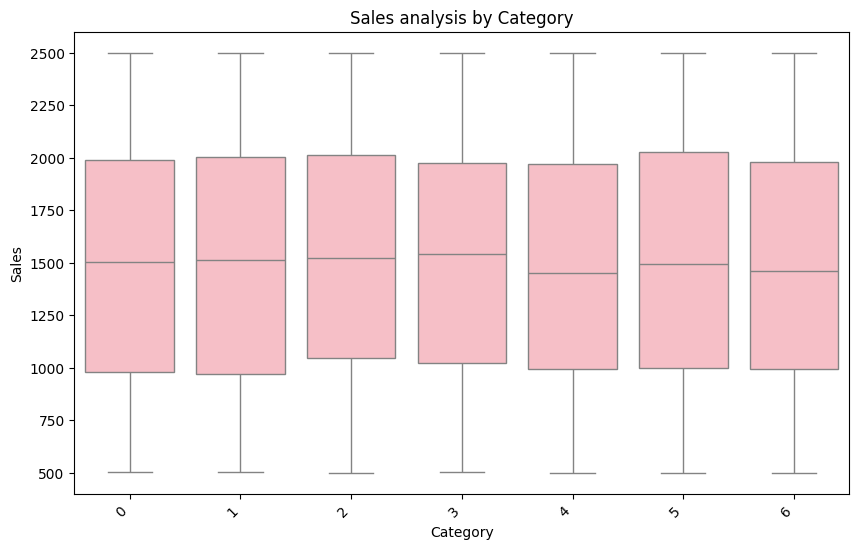

In [ ]:
#Sales analysis by Category
plt.figure(figsize=(10,6))
sns.boxplot(x='Category',y='Sales',data=df,color='lightpink')
plt.title('Sales analysis by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45,ha='right')
plt.show()


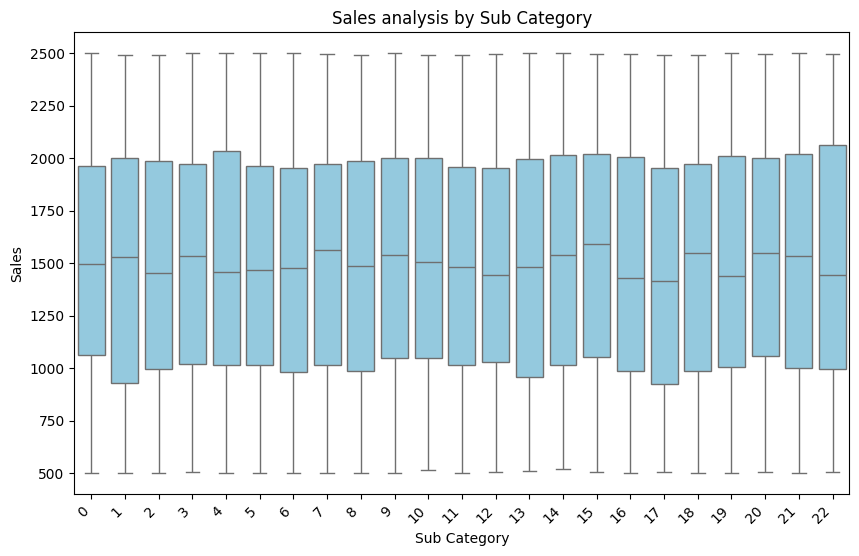

In [ ]:
#Sales analysis by subcategory
plt.figure(figsize=(10,6))
sns.boxplot(x='Sub Category',y='Sales',data=df,color='skyblue')
plt.title('Sales analysis by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Sales')
plt.xticks(rotation=45,ha='right')
plt.show()

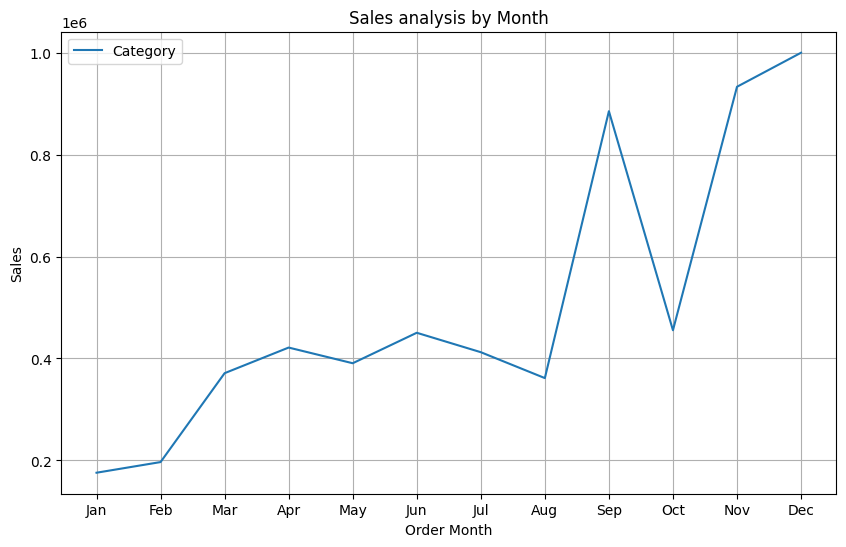

In [ ]:
# Sales that occur every month
plt.figure(figsize=(10,6))
monthly_sale=df.groupby('Order Month')['Sales'].sum().reset_index()
monthly_sales_sorted=monthly_sale.sort_values(by='Order Month')
plt.plot(monthly_sales_sorted['Order Month'],monthly_sales_sorted['Sales'],label='Category')
plt.title('Sales analysis by Month')
plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)

plt.show()

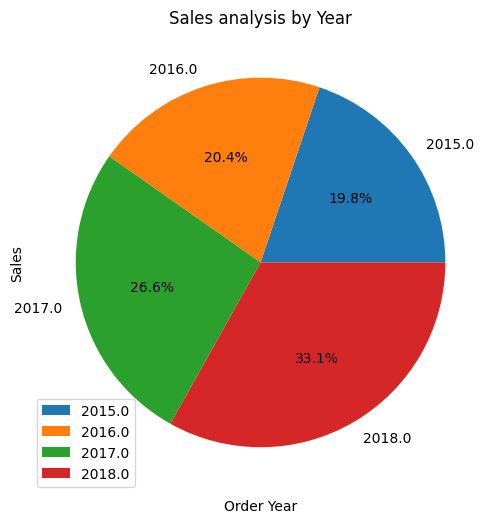

In [ ]:
#Sale analysis of the year
plt.figure(figsize=(10,6))
Yearly_sales=df.groupby('Order Year')['Sales'].sum()

plt.pie(Yearly_sales,labels=Yearly_sales.index,autopct='%1.1f%%')
plt.title('Sales analysis by Year')
plt.xlabel('Order Year')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
#Top 10 cities with most number of Sales

In [ ]:
df.columns


Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State',
       'Order Day', 'Order Month', 'Order Year'],
      dtype='object')

<ipython-input-41-b287fc10cad7>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


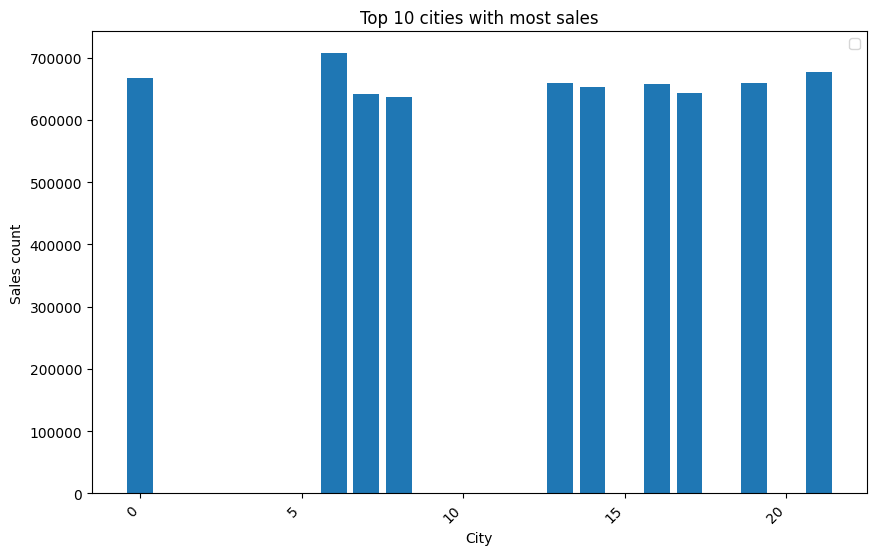

In [ ]:
top_ten_cities = (df.groupby('City')['Sales'].sum().reset_index() .sort_values(by='Sales', ascending=False)[:10] )
plt.figure(figsize=(10,6))
plt.bar(top_ten_cities['City'],top_ten_cities['Sales'])
plt.title('Top 10 cities with most sales')
plt.xticks(rotation=45,ha='right')
plt.xlabel('City')
plt.ylabel('Sales count')
plt.legend()
plt.show()

<ipython-input-42-944c0f357f4a>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


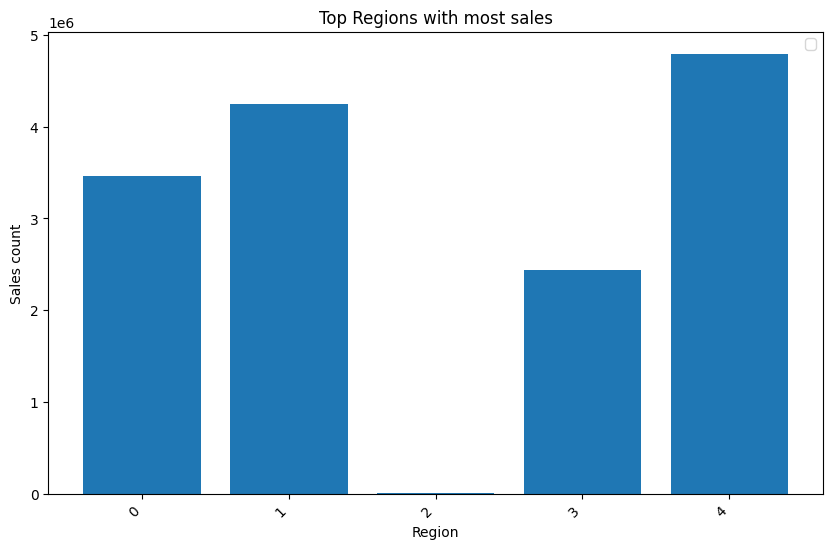

In [ ]:
#Top regions with most sales
top_regions = (df.groupby('Region')['Sales'].sum().reset_index() .sort_values(by='Sales', ascending=False)[:10] )
plt.figure(figsize=(10,6))
plt.bar(top_regions['Region'],top_regions['Sales'])
plt.title('Top Regions with most sales')
plt.xticks(rotation=45,ha='right')
plt.xlabel('Region')
plt.ylabel('Sales count')
plt.legend()
plt.show()

Mean Squared Error: 211117.33513304964
R-squared: 0.36890355640189587


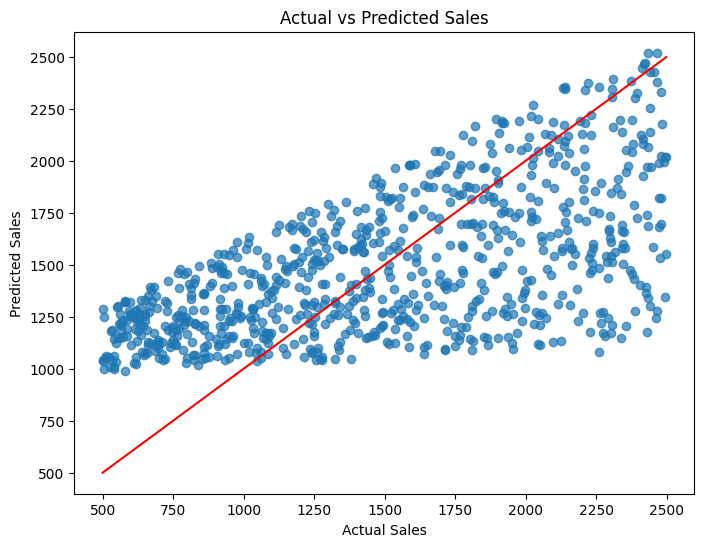

In [ ]:
df = df.dropna()  # Drop rows with any NaN values

# Feature selection: drop unnecessary columns
features = df.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales', 'Order Month'])
target = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the model output
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [ ]:
#Drop the null values
df = df.dropna()

<ipython-input-9-90430810a4f0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales', data=region_sales, palette='viridis')


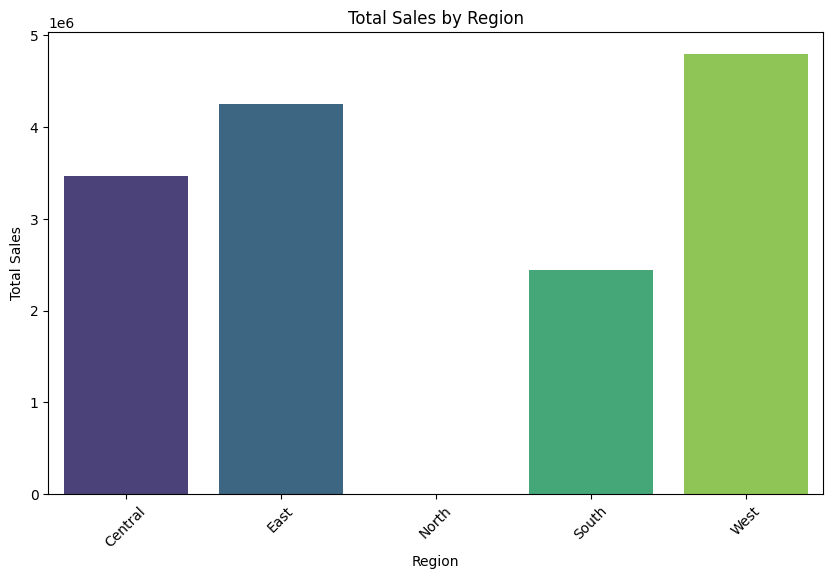

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/Supermart Grocery Sales - Retail Analytics Dataset.csv'
data = pd.read_csv(file_path)


region_sales = data.groupby('Region')['Sales'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=region_sales, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()




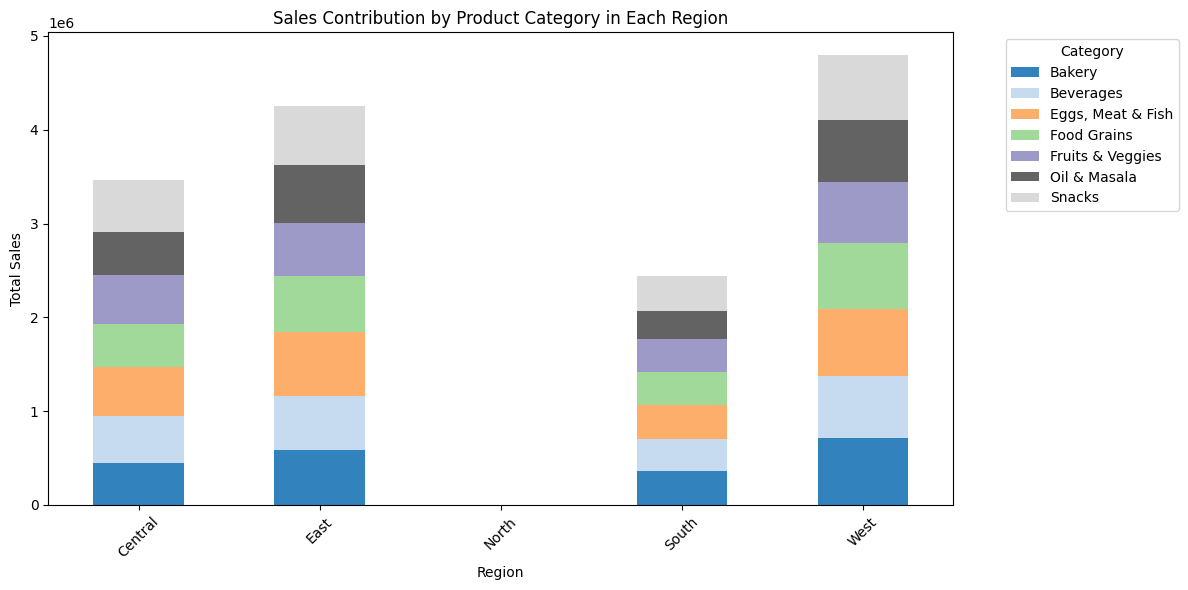

In [ ]:
region_category_sales = data.groupby(['Region', 'Category'])['Sales'].sum().unstack()


region_category_sales.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')
plt.title('Sales Contribution by Product Category in Each Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

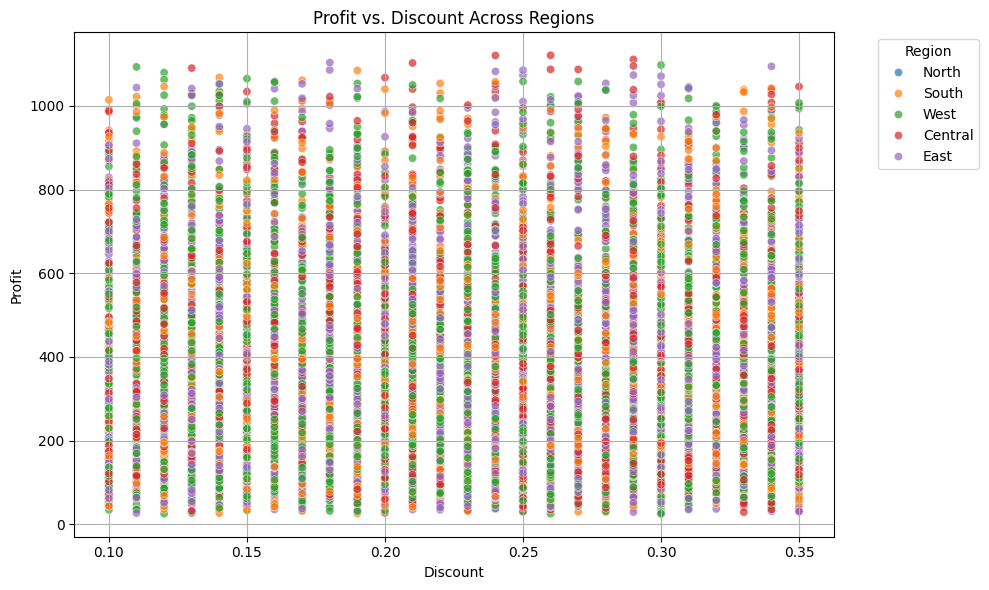

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', hue='Region', data=data, palette='tab10', alpha=0.7)
plt.title('Profit vs. Discount Across Regions')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


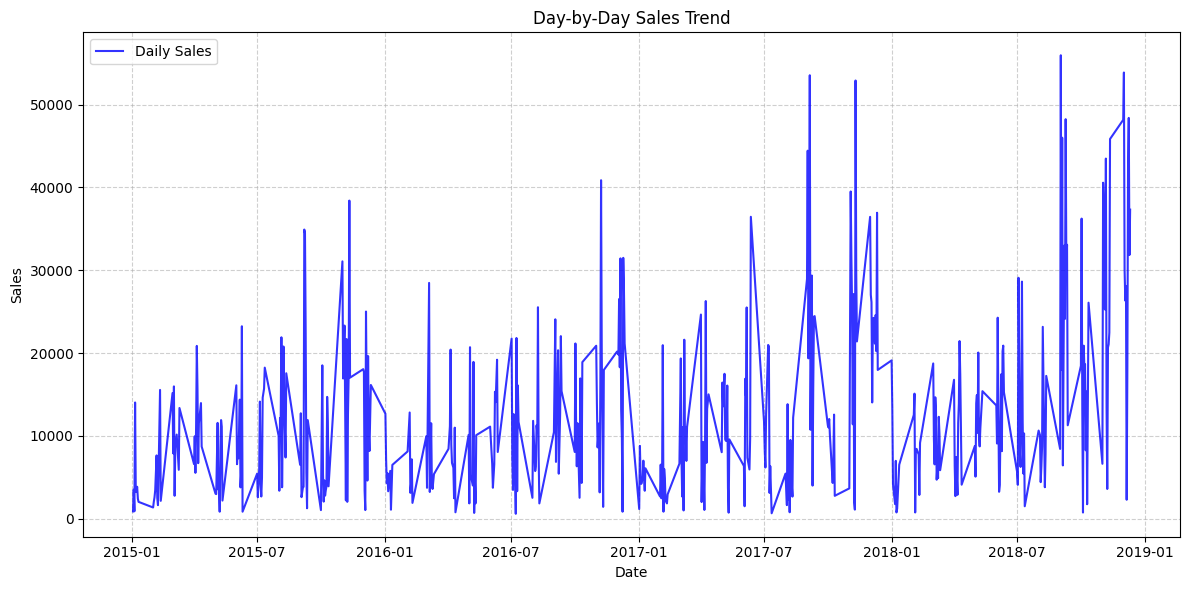

In [ ]:
# Convert 'Order Date' to datetime, handling invalid entries
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Remove rows with invalid dates
data = data.dropna(subset=['Order Date'])

# Aggregate sales by day
daily_sales = data.groupby('Order Date')['Sales'].sum().reset_index()

# Plot day-by-day sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], label='Daily Sales', color='blue', alpha=0.8)
plt.title('Day-by-Day Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
